My guess is — here we have:
* collection_slug: The collection to which the item belongs
* contract_address: All the sales are managed by a contract (a piece of code / a software) which sends the NFT to the winner of the bid. This is the address of the OpenSea contract. We can see that there is only one address for all the sales, which means that all sales are managed by the same contract.
* id: A unique identifier for each sale
* quantity: The number of items sold per transaction (see fungible / semi fungible below). As in the supermarket, you can buy 1 apple or 20.
* payment_token.name: The cryptocurrency used to buy the item.
* total_price: The cost paid by the winner. For Ether, this is expressed in Wei, the smallest denomination of ether. 1 ether = 1,000,000,000,000,000,000 Wei (10¹⁸).
* seller.address: The address of the seller
* transaction.timestamp: Date of the transaction
* winner_account.address: The address of the buyer
* payment_token.usd_price: The price of one token used to make the transaction in USD



In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
pd.pandas.set_option('display.max_columns', None)

In [ ]:

parse_dates = ['listing_date','asset_contract.created_date', 'collection.created_date']
nft_sale_df = pd.read_csv('/content/drive/MyDrive/nftdata/nftsale.csv', low_memory=False, parse_dates=parse_dates)

In [ ]:
nft_sale_df.head(5)

,Unnamed: 0,id,token_id,num_sales,background_color,image_url,image_preview_url,image_thumbnail_url,image_original_url,animation_url,animation_original_url,name,description,external_link,permalink,decimals,token_metadata,sell_orders,traits,top_bid,listing_date,is_presale,transfer_fee_payment_token,transfer_fee,asset_contract.address,asset_contract.asset_contract_type,asset_contract.created_date,asset_contract.name,asset_contract.nft_version,asset_contract.opensea_version,asset_contract.owner,asset_contract.schema_name,asset_contract.symbol,asset_contract.total_supply,asset_contract.description,asset_contract.external_link,asset_contract.image_url,asset_contract.default_to_fiat,asset_contract.dev_buyer_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.only_proxied_transfers,asset_contract.opensea_buyer_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,asset_contract.buyer_fee_basis_points,asset_contract.seller_fee_basis_points,asset_contract.payout_address,collection.banner_image_url,collection.chat_url,collection.created_date,collection.default_to_fiat,collection.description,collection.dev_buyer_fee_basis_points,collection.dev_seller_fee_basis_points,collection.discord_url,collection.display_data.card_display_style,collection.external_url,collection.featured,collection.featured_image_url,collection.hidden,collection.safelist_request_status,collection.image_url,collection.is_subject_to_whitelist,collection.large_image_url,collection.medium_username,collection.name,collection.only_proxied_transfers,collection.opensea_buyer_fee_basis_points,collection.opensea_seller_fee_basis_points,collection.payout_address,collection.require_email,collection.short_description,collection.slug,collection.telegram_url,collection.twitter_username,collection.instagram_username,collection.wiki_url,owner.user.username,owner.profile_img_url,owner.address,owner.config,creator.user.username,creator.profile_img_url,creator.address,creator.config,last_sale.asset.token_id,last_sale.asset.decimals,last_sale.asset_bundle,last_sale.event_type,last_sale.event_timestamp,last_sale.auction_type,last_sale.total_price,last_sale.payment_token.id,last_sale.payment_token.symbol,last_sale.payment_token.address,last_sale.payment_token.image_url,last_sale.payment_token.name,last_sale.payment_token.decimals,last_sale.payment_token.eth_price,last_sale.payment_token.usd_price,last_sale.transaction.block_hash,last_sale.transaction.block_number,last_sale.transaction.from_account.user.username,last_sale.transaction.from_account.profile_img_url,last_sale.transaction.from_account.address,last_sale.transaction.from_account.config,last_sale.transaction.id,last_sale.transaction.timestamp,last_sale.transaction.to_account.user.username,last_sale.transaction.to_account.profile_img_url,last_sale.transaction.to_account.address,last_sale.transaction.to_account.config,last_sale.transaction.transaction_hash,last_sale.transaction.transaction_index,last_sale.created_date,last_sale.quantity,creator,last_sale.transaction.from_account.user,last_sale.transaction.to_account.user,owner.user,creator.user,collection.display_data.images,last_sale,transfer_fee_payment_token.id,transfer_fee_payment_token.symbol,transfer_fee_payment_token.address,transfer_fee_payment_token.image_url,transfer_fee_payment_token.name,transfer_fee_payment_token.decimals,transfer_fee_payment_token.eth_price,transfer_fee_payment_token.usd_price
0,0,44596334,1,14377,NaN,https://lh3.googleusercontent.com/9GgkzN-7si-y...,https://lh3.googleusercontent.com/9GgkzN-7si-y...,https://lh3.googleusercontent.com/9GgkzN-7si-y...,https://arweave.net/nhjGl6alIKUbS9MmkYRCaf1Mjj...,NaN,NaN,Page,AB AETERNO,https://lostpoets.xyz/,https://opensea.io/assets/0xa7206d878c5c387182...,NaN,https://arweave.net/Fx_J8h0B1q6BQYBEeB2bi2Cp4k...,[{'created_date': '2021-11-26T13:59:52.852807'...,[],NaN,NaT,False,NaN,,0xa7206d878c5c3871826dfdb42191c49b1d11f466,semi-fungible,2021-09-03 04:01:42.829914,Unidentified contract,N

In [ ]:
list(nft_sale_df.columns )

['Unnamed: 0',
 'id',
 'token_id',
 'num_sales',
 'background_color',
 'image_url',
 'image_preview_url',
 'image_thumbnail_url',
 'image_original_url',
 'animation_url',
 'animation_original_url',
 'name',
 'description',
 'external_link',
 'permalink',
 'decimals',
 'token_metadata',
 'sell_orders',
 'traits',
 'top_bid',
 'listing_date',
 'is_presale',
 'transfer_fee_payment_token',
 'transfer_fee',
 'asset_contract.address',
 'asset_contract.asset_contract_type',
 'asset_contract.created_date',
 'asset_contract.name',
 'asset_contract.nft_version',
 'asset_contract.opensea_version',
 'asset_contract.owner',
 'asset_contract.schema_name',
 'asset_contract.symbol',
 'asset_contract.total_supply',
 'asset_contract.description',
 'asset_contract.external_link',
 'asset_contract.image_url',
 'asset_contract.default_to_fiat',
 'asset_contract.dev_buyer_fee_basis_points',
 'asset_contract.dev_seller_fee_basis_points',
 'asset_contract.only_proxied_transfers',
 'asset_contract.opensea_buye

In [ ]:
# the data has 130 columns and we do not need all of them.
nft_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14461 entries, 0 to 14460
Columns: 130 entries, Unnamed: 0 to transfer_fee_payment_token.usd_price
dtypes: bool(9), datetime64[ns](3), float64(25), int64(13), object(80)
memory usage: 13.5+ MB


In [ ]:
nft_sale_df.shape

(14461, 130)

In [ ]:
# check for null values 
nft_sale_df['background_color'].isna().sum()

14346

In [ ]:
# check for percentages for null values 
for column in list(nft_sale_df.columns):
    print(f"{nft_sale_df[str(column)].isnull().sum()/len(nft_sale_df):.2%} of {column} is null")

0.00% of Unnamed: 0 is null
0.00% of id is null
0.00% of token_id is null
0.00% of num_sales is null
99.20% of background_color is null
4.69% of image_url is null
4.69% of image_preview_url is null
4.69% of image_thumbnail_url is null
59.27% of image_original_url is null
73.54% of animation_url is null
73.28% of animation_original_url is null
5.28% of name is null
27.61% of description is null
70.80% of external_link is null
0.00% of permalink is null
72.34% of decimals is null
59.71% of token_metadata is null
56.81% of sell_orders is null
0.00% of traits is null
100.00% of top_bid is null
100.00% of listing_date is null
0.00% of is_presale is null
100.00% of transfer_fee_payment_token is null
0.00% of transfer_fee is null
0.00% of asset_contract.address is null
0.00% of asset_contract.asset_contract_type is null
0.00% of asset_contract.created_date is null
0.00% of asset_contract.name is null
67.26% of asset_contract.nft_version is null
45.45% of asset_contract.opensea_version is null

In [ ]:
for x in nft_sale_df.columns:
    print(f'{x} has a {nft_sale_df[x].dtypes} type')

Unnamed: 0 has a int64 type
id has a int64 type
token_id has a object type
num_sales has a int64 type
background_color has a object type
image_url has a object type
image_preview_url has a object type
image_thumbnail_url has a object type
image_original_url has a object type
animation_url has a object type
animation_original_url has a object type
name has a object type
description has a object type
external_link has a object type
permalink has a object type
decimals has a float64 type
token_metadata has a object type
sell_orders has a object type
traits has a object type
top_bid has a float64 type
listing_date has a datetime64[ns] type
is_presale has a bool type
transfer_fee_payment_token has a float64 type
transfer_fee has a object type
asset_contract.address has a object type
asset_contract.asset_contract_type has a object type
asset_contract.created_date has a datetime64[ns] type
asset_contract.name has a object type
asset_contract.nft_version has a object type
asset_contract.opense

In [ ]:
rev_nft = nft_sale_df.drop(['Unnamed: 0', 'image_url', 'image_preview_url', 'image_thumbnail_url', 'image_original_url',
                 'animation_url', 'animation_original_url', 'external_link', 'asset_contract.external_link',
                  'asset_contract.image_url','collection.banner_image_url', 'collection.large_image_url', 'collection.wiki_url',
                 'owner.profile_img_url', 'last_sale.payment_token.image_url', 'last_sale.transaction.from_account.profile_img_url',
                 'last_sale.transaction.to_account.profile_img_url', 'collection.display_data.images', 'transfer_fee_payment_token.image_url'],
                axis=1)

In [ ]:
rev_nft.shape

(14461, 111)

In [ ]:
rev_nft['num_sales'].isna().value_counts()

False    14461
Name: num_sales, dtype: int64

In [ ]:
rev_nft['sell_orders'].isna().value_counts()

True     8216
False    6245
Name: sell_orders, dtype: int64

In [ ]:
rev_nft['last_sale.event_type'].isna().value_counts()

True     10277
False     4184
Name: last_sale.event_type, dtype: int64

In [ ]:
rev_nft['is_presale'].isna().value_counts()

False    14461
Name: is_presale, dtype: int64

In [ ]:
# join the 3 columns into one for the target variable
len(rev_nft[(rev_nft['num_sales'] > 0) |
            (rev_nft['sell_orders'].notna()) | 
            (rev_nft['last_sale.event_type'].notna())])/len(rev_nft)

0.66800359587857

In [ ]:
rev_nft['target'] = np.where((rev_nft['num_sales'] > 0) |
            (rev_nft['sell_orders'].notna()) | 
            (rev_nft['last_sale.event_type'].notna()), 1, 0)

In [ ]:
rev_nft.target.value_counts()

1    9660
0    4801
Name: target, dtype: int64

In [ ]:
rev_nft_df = rev_nft.drop(labels = ['num_sales', 'sell_orders', 'last_sale.event_type'], axis=1)
# rev_nft_df.head()

In [ ]:
rev_nft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14461 entries, 0 to 14460
Columns: 109 entries, id to target
dtypes: bool(9), datetime64[ns](3), float64(25), int64(12), object(60)
memory usage: 11.2+ MB


In [ ]:
rev_nft_df.describe()

,id,decimals,top_bid,transfer_fee_payment_token,asset_contract.owner,asset_contract.total_supply,asset_contract.dev_buyer_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_buyer_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,asset_contract.buyer_fee_basis_points,asset_contract.seller_fee_basis_points,collection.dev_buyer_fee_basis_points,collection.dev_seller_fee_basis_points,collection.opensea_buyer_fee_basis_points,collection.opensea_seller_fee_basis_points,last_sale.asset.decimals,last_sale.asset_bundle,last_sale.payment_token.id,last_sale.payment_token.decimals,last_sale.payment_token.eth_price,last_sale.payment_token.usd_price,last_sale.transaction.block_number,last_sale.transaction.id,last_sale.transaction.transaction_index,last_sale.quantity,creator,last_sale.transaction.from_account.user,last_sale.transaction.to_account.user,owner.user,creator.user,last_sale,transfer_fee_payment_token.id,transfer_fee_payment_token.decimals,transfer_fee_payment_token.eth_price,transfer_fee_payment_token.usd_price,target
count,1.446100e+04,4000.0,0.0,0.0,1.165900e+04,1328.000000,14461.0,14461.000000,14461.0,14461.000000,14461.0,14461.000000,14461.0,14461.000000,14461.0,14461.000000,29.0,0.0,4184.000000,4184.000000,4178.000000,4178.000000,4.184000e+03,4.184000e+03,4184.000000,4152.000000,0.0,0.0,0.0,0.0,0.0,0.0,19.0,19.0,1.900000e+01,1.900000e+01,14461.000000
mean,6.189012e+07,0.0,NaN,NaN,1.352265e+07,137.871235,0.0,136.289676,0.0,249.861697,0.0,386.151373,0.0,455.793790,0.0,249.861697,0.0,NaN,4.646750,17.919694,0.983943,3977.147082,1.314609e+07,1.677067e+08,167.816922,4.567678,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.453979e-03,3.830000e+00,0.668004
std,4.724710e+07,0.0,NaN,NaN,2.972555e+07,1146.537191,0.0,247.061572,0.0,5.878692,0.0,247.060855,0.0,384.439182,0.0,5.878692,0.0,NaN,33.551677,0.970645,0.126018,513.055590,8.006248e+05,4.290864e+07,102.312160,90.310958,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.227824e-19,9.125166e-16,0.470946
min,1.787230e+05,0.0,NaN,NaN,1.000000e+02,0.000000,0.0,0.000000,0.0,0.000000,0.0,250.000000,0.0,0.000000,0.0,0.000000,0.0,NaN,1.000000,0.000000,0.000031,0.142340,5.520906e+06,2.357329e+06,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.453979e-03,3.830000e+00,0.000000
25%,1.706683e+07,0.0,NaN,NaN,1.023840e+05,0.000000,0.0,0.000000,0.0,250.000000,0.0,250.000000,0.0,250.000000,0.0,250.000000,0.0,NaN,1.000000,18.000000,1.000000,4043.600000,1.302388e+07,1.482156e+08,89.750000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.453979e-03,3.830000e+00,0.000000
50%,5.714872e+07,0.0,NaN,NaN,1.023840e+05,0.000000,0.0,0.000000,0.0,250.000000,0.0,250.000000,0.0,250.000000,0.0,250.000000,0.0,NaN,1.000000,18.000000,1.000000,4043.600000,1.340466e+07,1.804090e+08,150.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.453979e-03,3.830000e+00,1.000000
75%,1.118344e+08,0.0,NaN,NaN,1.139878e+06,0.000000,0.0,250.000000,0.0,250.000000,0.0,500.000000,0.0,1000.000000,0.0,250.000000,0.0,NaN,1.000000,18.000000,1.000000,4043.600000,1.363502e+07,2.030365e+08,231.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.453979e-03,3.830000e+00,1.000000
max,1.190305e+08,0.0,NaN,NaN,1.452623e+08,10333.000000,0.0,1250.000000,0.0,250.000000,0.0,1500.000000,0.0,1500.000000,0.0,250.000000,0.0,NaN,690.000000,18.000000,1.493008,4043.600000,1.369297e+07,2.098272e+08,793.000000,5000.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.453979e-03,3.830000e+00,1.000000


In [ ]:
nft_num = [num for num in rev_nft_df.columns if rev_nft_df[num].dtypes not in ['O', 'bool']]

print(f"The length of numerical variable:{len(nft_num)}")

rev_nft_df[nft_num].head()

The length of numerical variable:40


,id,decimals,top_bid,listing_date,transfer_fee_payment_token,asset_contract.created_date,asset_contract.owner,asset_contract.total_supply,asset_contract.dev_buyer_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_buyer_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,asset_contract.buyer_fee_basis_points,asset_contract.seller_fee_basis_points,collection.created_date,collection.dev_buyer_fee_basis_points,collection.dev_seller_fee_basis_points,collection.opensea_buyer_fee_basis_points,collection.opensea_seller_fee_basis_points,last_sale.asset.decimals,last_sale.asset_bundle,last_sale.payment_token.id,last_sale.payment_token.decimals,last_sale.payment_token.eth_price,last_sale.payment_token.usd_price,last_sale.transaction.block_number,last_sale.transaction.id,last_sale.transaction.transaction_index,last_sale.quantity,creator,last_sale.transaction.from_account.user,last_sale.transaction.to_account.user,owner.user,creator.user,last_sale,transfer_fee_payment_token.id,transfer_fee_payment_token.decimals,transfer_fee_payment_token.eth_price,transfer_fee_payment_token.usd_price,target
0,44596334,NaN,NaN,NaT,NaN,2021-09-03 04:01:42.829914,2504088.0,NaN,0,1000,0,250,0,1250,2021-09-03 04:50:03.338901,0,1000,0,250,NaN,NaN,1.0,18.0,1.0,4043.6,13692860.0,209813729.0,214.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,48159964,NaN,NaN,NaT,NaN,2021-09-09 15:40:47.108114,82251339.0,NaN,0,638,0,250,0,888,2021-09-09 17:26:23.390102,0,638,0,250,NaN,NaN,1.0,18.0,1.0,4043.6,13692543.0,209770332.0,267.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,76676445,0.0,NaN,NaT,NaN,2021-10-20 18:56:15.301204,92620665.0,3.0,0,750,0,250,0,1000,2021-10-20 18:56:17.613352,0,750,0,250,0.0,NaN,1.0,18.0,1.0,4043.6,13467549.0,186047015.0,254.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,62163700,NaN,NaN,NaT,NaN,2021-04-05 12:27:21.409843,25897811.0,NaN,0,500,0,250,0,750,2021-04-05 12:40:46.091120,0,500,0,250,NaN,NaN,1.0,18.0,1.0,4043.6,13692924.0,209822255.0,164.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,55436079,NaN,NaN,NaT,NaN,2021-09-17 04:51:21.073075,80258991.0,NaN,0,500,0,250,0,750,2021-09-17 16:19:16.049956,0,500,0,250,NaN,NaN,1.0,18.0,1.0,4043.6,13691661.0,209651027.0,191.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
nft_year = [time for time in nft_num if 'date' in time or 'year' in time]
nft_year

['listing_date', 'asset_contract.created_date', 'collection.created_date']

In [ ]:
# analyse the date in regard to the target, to see if there's relationship

rev_nft_df.groupby('collection.created_date')['target'].median()

collection.created_date
2019-04-26 22:13:02.062867    1.0
2019-04-26 22:13:02.287359    1.0
2019-04-26 22:13:04.207050    1.0
2019-04-26 22:13:06.773965    1.0
2019-04-26 22:13:09.153813    1.0
                             ... 
2021-11-25 16:31:56.117158    0.0
2021-11-25 16:32:04.528546    0.0
2021-11-25 16:32:12.821220    0.0
2021-11-26 06:18:23.098253    1.0
2021-11-26 15:02:18.348698    1.0
Name: target, Length: 2164, dtype: float64

In [ ]:
nft_float = [col for col in rev_nft_df.columns if rev_nft_df[col].dtypes == 'float64']
print(f"The length of boolean variable:{len(nft_float)}")

rev_nft_df[nft_float].head()

The length of boolean variable:25


,decimals,top_bid,transfer_fee_payment_token,asset_contract.owner,asset_contract.total_supply,last_sale.asset.decimals,last_sale.asset_bundle,last_sale.payment_token.id,last_sale.payment_token.decimals,last_sale.payment_token.eth_price,last_sale.payment_token.usd_price,last_sale.transaction.block_number,last_sale.transaction.id,last_sale.transaction.transaction_index,last_sale.quantity,creator,last_sale.transaction.from_account.user,last_sale.transaction.to_account.user,owner.user,creator.user,last_sale,transfer_fee_payment_token.id,transfer_fee_payment_token.decimals,transfer_fee_payment_token.eth_price,transfer_fee_payment_token.usd_price
0,NaN,NaN,NaN,2504088.0,NaN,NaN,NaN,1.0,18.0,1.0,4043.6,13692860.0,209813729.0,214.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,82251339.0,NaN,NaN,NaN,1.0,18.0,1.0,4043.6,13692543.0,209770332.0,267.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,92620665.0,3.0,0.0,NaN,1.0,18.0,1.0,4043.6,13467549.0,186047015.0,254.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,25897811.0,NaN,NaN,NaN,1.0,18.0,1.0,4043.6,13692924.0,209822255.0,164.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,80258991.0,NaN,NaN,NaN,1.0,18.0,1.0,4043.6,13691661.0,209651027.0,191.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


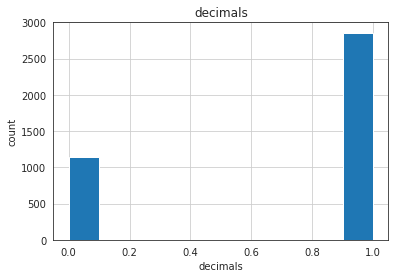

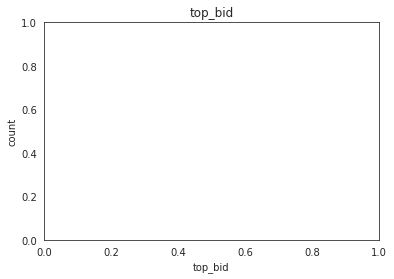

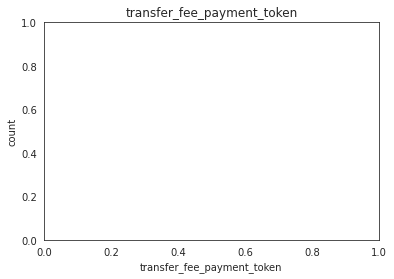

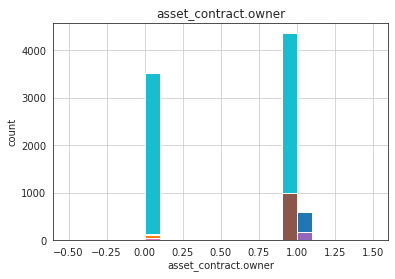

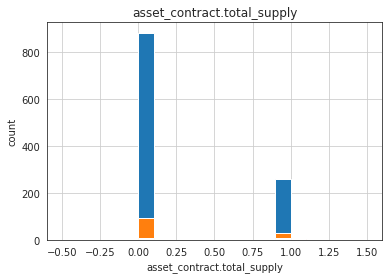

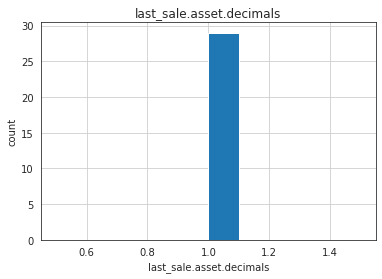

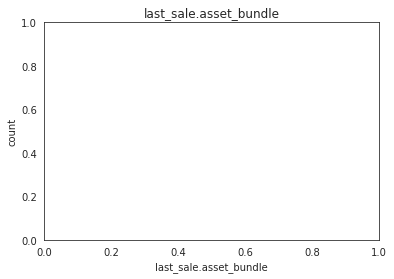

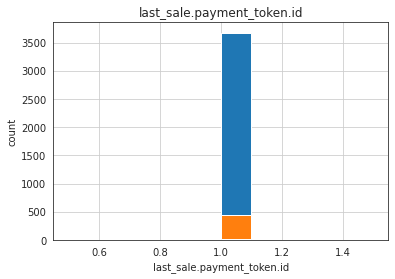

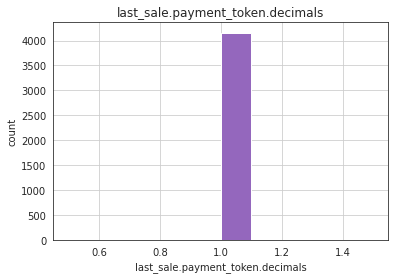

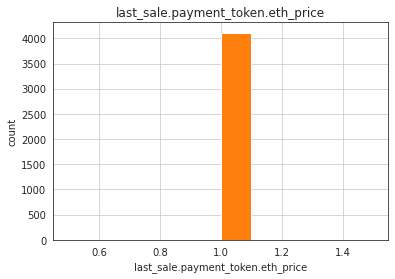

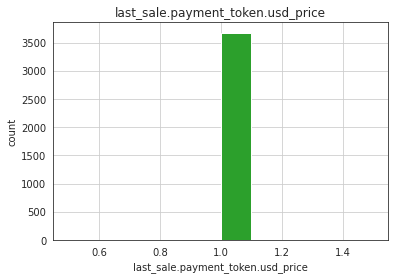

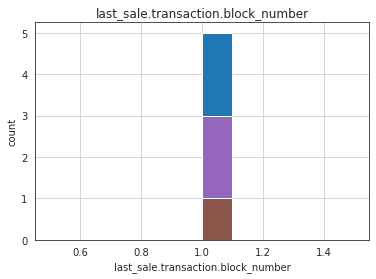

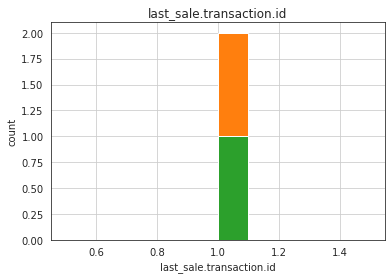

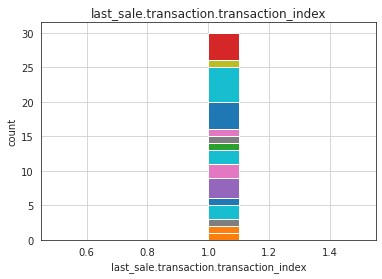

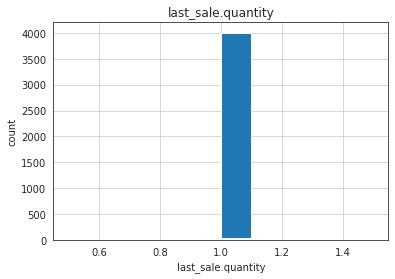

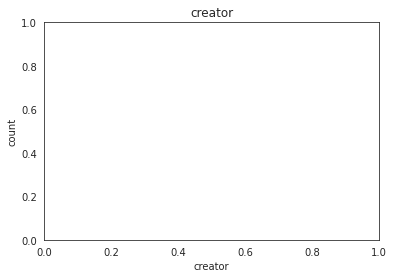

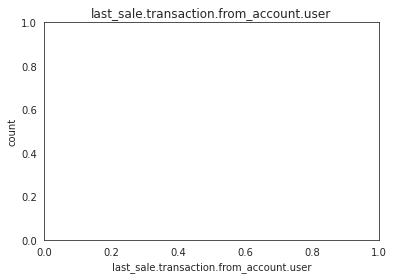

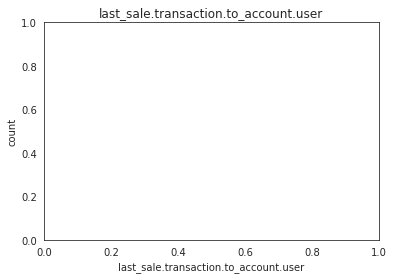

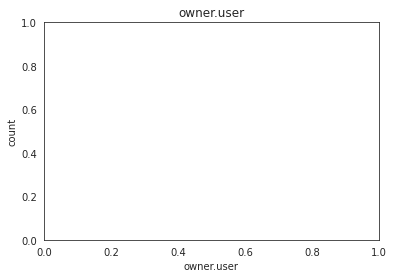

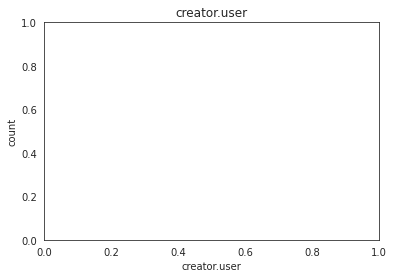

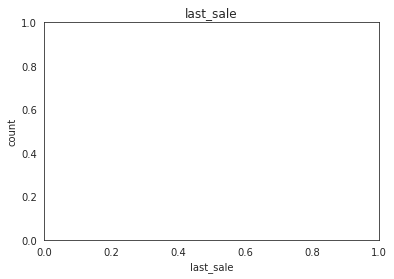

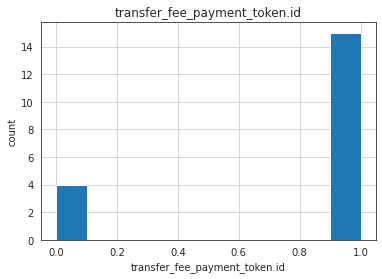

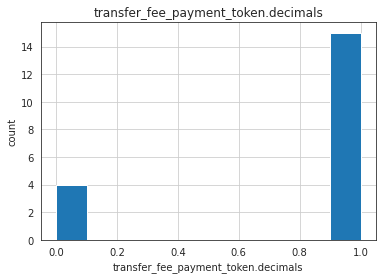

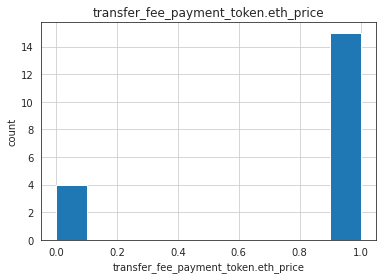

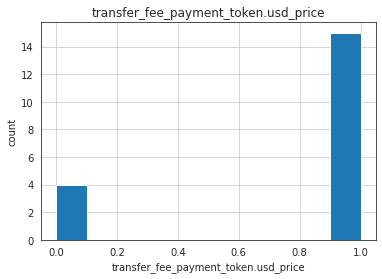

In [ ]:
# find the realationship between the float variable and the target
sns.set_style('white')
for feat in nft_float:
    data = rev_nft_df.copy()
    data.groupby(feat)['target'].hist()
    plt.xlabel(feat)
    plt.ylabel('count')
    plt.title(feat)
    plt.show()

In [ ]:
rev_nft_df['asset_contract.seller_fee_basis_points'].value_counts()

250     9830
500     2751
750      867
1250     539
1000     250
850       50
950       30
1138      22
650       22
550       22
450       19
350       17
1500      10
600        9
800        6
940        6
1200       2
1050       1
730        1
670        1
540        1
900        1
640        1
625        1
888        1
916        1
Name: asset_contract.seller_fee_basis_points, dtype: int64

In [ ]:
nft_cat = [cat for cat in rev_nft_df.columns if rev_nft_df[cat].dtypes == 'O']

print(f"The length of numerical variable:{len(nft_cat)}")

rev_nft_df[nft_cat].head()

The length of numerical variable:60


,token_id,background_color,name,description,permalink,token_metadata,traits,transfer_fee,asset_contract.address,asset_contract.asset_contract_type,asset_contract.name,asset_contract.nft_version,asset_contract.opensea_version,asset_contract.schema_name,asset_contract.symbol,asset_contract.description,asset_contract.payout_address,collection.chat_url,collection.description,collection.discord_url,collection.display_data.card_display_style,collection.external_url,collection.featured_image_url,collection.safelist_request_status,collection.image_url,collection.medium_username,collection.name,collection.payout_address,collection.short_description,collection.slug,collection.telegram_url,collection.twitter_username,collection.instagram_username,owner.user.username,owner.address,owner.config,creator.user.username,creator.profile_img_url,creator.address,creator.config,last_sale.asset.token_id,last_sale.event_timestamp,last_sale.auction_type,last_sale.total_price,last_sale.payment_token.symbol,last_sale.payment_token.address,last_sale.payment_token.name,last_sale.transaction.block_hash,last_sale.transaction.from_account.user.username,last_sale.transaction.from_account.address,last_sale.transaction.from_account.config,last_sale.transaction.timestamp,last_sale.transaction.to_account.user.username,last_sale.transaction.to_account.address,last_sale.transaction.to_account.config,last_sale.transaction.transaction_hash,last_sale.created_date,transfer_fee_payment_token.symbol,transfer_fee_payment_token.address,transfer_fee_payment_token.name
0,1,NaN,Page,AB AETERNO,https://opensea.io/assets/0xa7206d878c5c387182...,https://arweave.net/Fx_J8h0B1q6BQYBEeB2bi2Cp4k...,[],,0xa7206d878c5c3871826dfdb42191c49b1d11f466,semi-fungible,Unidentified contract,NaN,NaN,ERC1155,NaN,∴ AB AETERNO,0x8e8717dcd1687080757cb513d7d6702625973be8,NaN,∴ AB AETERNO,NaN,cover,https://lostpoets.xyz/,https://lh3.googleusercontent.com/VNQfgH6h0cui...,verified,https://lh3.googleusercontent.com/cGKkMxKQ-7J0...,NaN,LOSTPOETS,0x8e8717dcd1687080757cb513d7d6702625973be8,NaN,lostpoets,NaN,poetslost,NaN,NullAddress,0x0000000000000000000000000000000000000000,NaN,pak,https://storage.googleapis.com/opensea-static/...,0x2ce780d7c743a57791b835a9d6f998b15bbba5a4,verified,1,2021-11-27T00:25:24,NaN,490000000000000000,ETH,0x0000000000000000000000000000000000000000,Ether,0xb2fadaf6b1fd00d68195086b85e27b9120d45427814b...,davidne0,0x51814118035cfa6a5f0e8ee7f5b581c3095c6c53,NaN,2021-11-27T00:25:24,OpenSea-Orders,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,verified,0x77c5ac229ebdafce9a915c81104432028027f8313939...,2021-11-27T00:25:42.232625,NaN,NaN,NaN
1,888,NaN,888 Genesis,"8,888 Editions of the Genesis NFT from @crypto...",https://opensea.io/assets/0x36d30b3b85255473d2...,https://arweave.net/8qA0llVrlpgEWyD_jkqjVJqJfM...,"[{'trait_type': 'Artist', 'value': '888', 'dis...",,0x36d30b3b85255473d27dd0f7fd8f35e36a9d6f06,semi-fungible,Unidentified contract,NaN,NaN,ERC1155,NaN,8888 Editions of the Genesis NFT from 888 to c...,0x716eb921f3b346d2c5749b5380dc740d359055d7,NaN,8888 Editions of the Genesis NFT from 888 to c...,https://discord.gg/888tnw,contain,NaN,https://lh3.googleusercontent.com/pnJeSudJAfhA...,verified,https://lh3.googleusercontent.com/pnJeSudJAfhA...,NaN,888 inner circle,0x716eb921f3b346d2c5749b5380dc740d359055d7,NaN,888innercircle,NaN,crypto888crypto,NaN,NullAddress,0x0000000000000000000000000000000000000000,NaN,888innercircle,https://storage.googleapis.com/opensea-static/...,0x3660f30b87d19a30974db4fe527e45fe57a70dea,NaN,888,2021-11-26T23:08:15,NaN,399900000000000000,ETH,0x0000000000000000000000000000000000000000,Ether,0x49963a6291a944f4dddd5b8d7ef451c621b7b66c4c9a...,Jimbolimbo,0x0dfd069770dfd14408f2c3420d12d7402e92fa77,NaN,2021-11-26T23:08:15,OpenSea-Orders,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,verified,0x8ef7ff825fc154e1abf0e024244b903eb6ab86ad8fe6...,2021-11-26T23:08:52.317888,NaN,NaN,NaN
2,0,NaN,Personality Pod - Level 1 - X/8008,You can buy one of the 8008 Intelligence Level...,h

In [ ]:
for feat in nft_cat:
    print(f"The column is {feat} and number of features are {len(rev_nft_df[feat].unique())} ")

The column is token_id and number of features are 14461 
The column is background_color and number of features are 26 
The column is name and number of features are 11119 
The column is description and number of features are 8115 
The column is permalink and number of features are 14461 
The column is token_metadata and number of features are 5827 
The column is traits and number of features are 6723 
The column is transfer_fee and number of features are 7 
The column is asset_contract.address and number of features are 454 
The column is asset_contract.asset_contract_type and number of features are 2 
The column is asset_contract.name and number of features are 433 
The column is asset_contract.nft_version and number of features are 4 
The column is asset_contract.opensea_version and number of features are 2 
The column is asset_contract.schema_name and number of features are 3 
The column is asset_contract.symbol and number of features are 401 
The column is asset_contract.descriptio

In [ ]:
rev_nft_df['collection.slug'].value_counts()

dodgers-mlb-crypto               2426
lucky-binary-nft-number          1540
rarible                          1001
hero                              605
ropoli                            248
                                 ... 
safemooncards                       1
coti-autumn-nfts                    1
wpl-golden-collection               1
nightfamily                         1
untitled-collection-137550580       1
Name: collection.slug, Length: 2171, dtype: int64

In [ ]:
rev_nft_df['asset_contract.name'].value_counts(normalize=True)

OpenSea Collection             0.545260
Dodgers MLB Crypto             0.167762
Rarible 1155                   0.069152
Hero                           0.041837
parallel                       0.011756
                                 ...   
RiverMen                       0.000069
BoredApeKennelClub             0.000069
Unicode (for Geeks)            0.000069
DeHorizon                      0.000069
Beeple Round 2 Open Edition    0.000069
Name: asset_contract.name, Length: 433, dtype: float64

In [ ]:
rev_nft_df['asset_contract.schema_name'].value_counts()

ERC1155        9729
ERC721         4728
CRYPTOPUNKS       4
Name: asset_contract.schema_name, dtype: int64

In [ ]:
nft_asset = [asset for asset in rev_nft_df if 'asset_contract' in asset]
# rev_nft_df[nft_asset].head()

In [ ]:
asset_df = rev_nft_df[nft_asset]

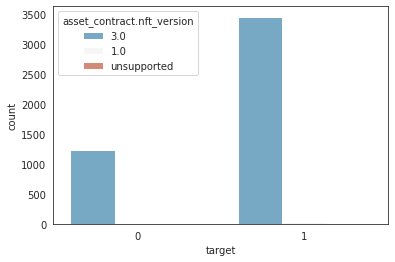

In [ ]:
sns.countplot(x='target', hue='asset_contract.nft_version', data=rev_nft_df,
              palette = 'RdBu_r')

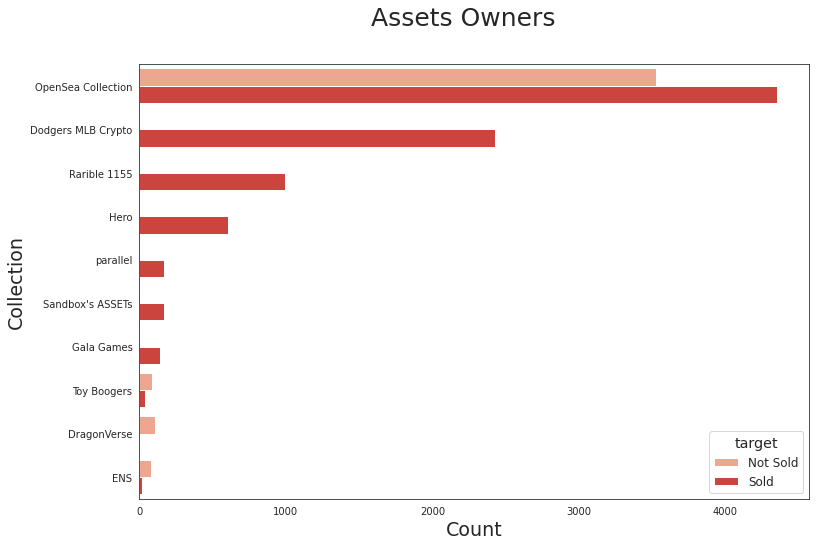

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=rev_nft_df,
              y='asset_contract.name',
              hue='target',
              order=rev_nft_df['asset_contract.name'].value_counts().iloc[:10].index, 
              palette = 'Reds',
              ax=ax)
sns.set_style("white")
fig.suptitle('Assets Owners', fontsize=25)
ax.set_xlabel('Count', fontsize=19)
ax.set_ylabel('Collection', fontsize=19)
plt.legend(title='target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='best');

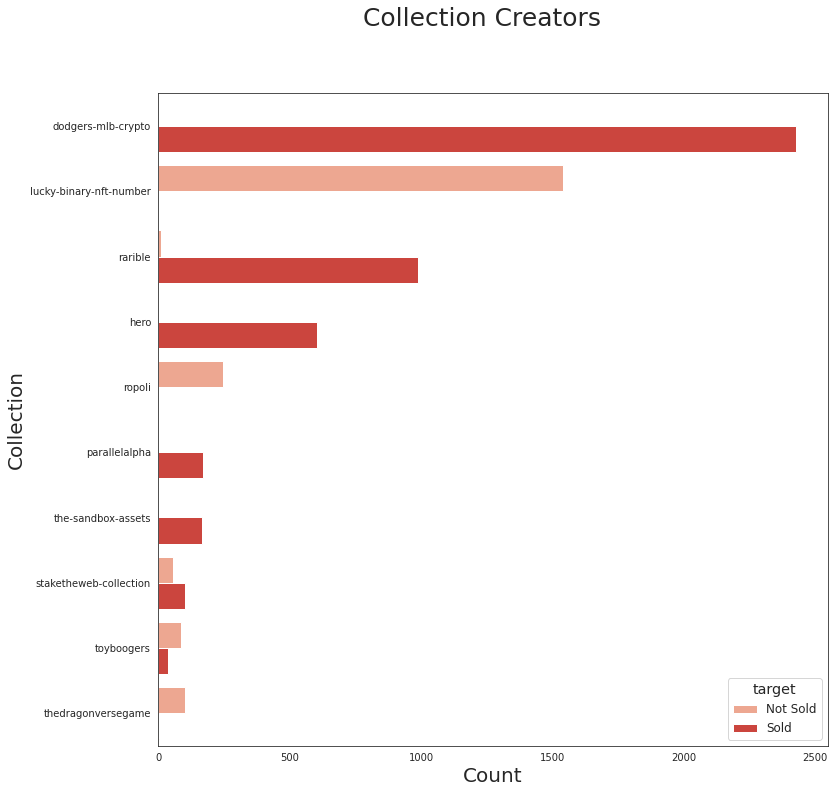

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.countplot(data=rev_nft_df,
              y='collection.slug',
              hue='target',
              order=rev_nft_df['collection.slug'].value_counts().iloc[:10].index, 
              palette = 'Reds',
              ax=ax)
sns.set_style("white")
fig.suptitle('Collection Creators', fontsize=25)
ax.set_xlabel('Count', fontsize=20)
ax.set_ylabel('Collection', fontsize=20)
plt.legend(title='target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='best');

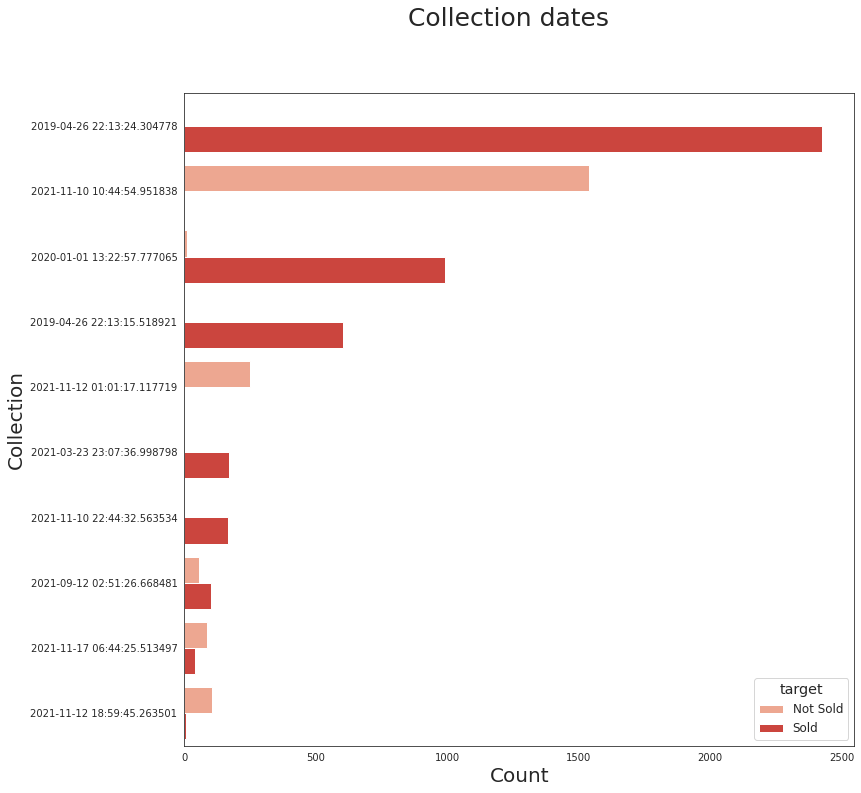

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.countplot(data=rev_nft_df,
              y='collection.created_date',
              hue='target',
              order=rev_nft_df['collection.created_date'].value_counts().iloc[:10].index, 
              palette = 'Reds',
              ax=ax)
sns.set_style("white")
fig.suptitle('Collection dates', fontsize=25)
ax.set_xlabel('Count', fontsize=20)
ax.set_ylabel('Collection', fontsize=20)
plt.legend(title='target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='best');

In [ ]:
for column in list(rev_nft_df.columns):
    print(f"{rev_nft_df[str(column)].isnull().sum()/len(rev_nft_df):.2%} of {column} is null")

0.00% of id is null
0.00% of token_id is null
99.20% of background_color is null
5.28% of name is null
27.61% of description is null
0.00% of permalink is null
72.34% of decimals is null
59.71% of token_metadata is null
0.00% of traits is null
100.00% of top_bid is null
100.00% of listing_date is null
0.00% of is_presale is null
100.00% of transfer_fee_payment_token is null
0.00% of transfer_fee is null
0.00% of asset_contract.address is null
0.00% of asset_contract.asset_contract_type is null
0.00% of asset_contract.created_date is null
0.00% of asset_contract.name is null
67.26% of asset_contract.nft_version is null
45.45% of asset_contract.opensea_version is null
19.38% of asset_contract.owner is null
0.00% of asset_contract.schema_name is null
9.06% of asset_contract.symbol is null
90.82% of asset_contract.total_supply is null
59.59% of asset_contract.description is null
0.00% of asset_contract.default_to_fiat is null
0.00% of asset_contract.dev_buyer_fee_basis_points is null
0.00%

In [ ]:
# selecting target columns and desired predictors

df = rev_nft_df[[ 
    # basic attributes    
    'id', 'token_id', 'name', 'traits', 'description', 'is_presale',
    
    # asset attributes
    'asset_contract.created_date', 'asset_contract.name', 'asset_contract.total_supply',
    'asset_contract.symbol', 'asset_contract.schema_name', 'asset_contract.asset_contract_type', 
    'asset_contract.nft_version', 'asset_contract.opensea_version',
    'asset_contract.seller_fee_basis_points', 'asset_contract.dev_seller_fee_basis_points',
    'asset_contract.opensea_seller_fee_basis_points', 
    
    # collection attributes
    'collection.created_date', 'collection.slug', 'collection.safelist_request_status', 'collection.featured', 
    'collection.description',
    'collection.dev_seller_fee_basis_points', 'collection.opensea_seller_fee_basis_points',
    'collection.external_url', 'collection.image_url', 'collection.twitter_username', 'collection.instagram_username', 'collection.medium_username', 'collection.chat_url', 
    
    # creator attributes
    'creator.user.username',
    
    # owner attributes
    'owner.address',
    'target'
    ]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14461 entries, 0 to 14460
Data columns (total 33 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   id                                              14461 non-null  int64         
 1   token_id                                        14461 non-null  object        
 2   name                                            13698 non-null  object        
 3   traits                                          14461 non-null  object        
 4   description                                     10469 non-null  object        
 5   is_presale                                      14461 non-null  bool          
 6   asset_contract.created_date                     14461 non-null  datetime64[ns]
 7   asset_contract.name                             14461 non-null  object        
 8   asset_contract.total_supply                   

In [ ]:
df.to_csv('revised_nft.csv')